# Лабораторная по гиперболическим уравнениям

Мой шаблон - прямоугольник:

(U k+1 m−1   − U k m-1  +  U k+1 m  − U k m)/2τ+c(U k+1 m −U k+1 m−1  +  U k m  −  U k m−1)/2h= F k+1/2 m+1/2,

In [94]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Заполняю начальными значениями матрицу :

In [95]:
c=0.9
def F(t, x):
    return t**2*x**3

def fi(x):
    return (x**3 - 4) / (16* (c**2))
def ksi(t):
    return c * (t**3-8) / 16

t_max = 2
N=200
tau = t_max/N
x_max = 2
h = x_max/N

In [96]:
N_t = int(t_max / tau + 1)
N_x = int(x_max / h + 1)

matr = np.zeros([N_t, N_x])
for m in range(0, N_x):
    matr[0, m] = fi(h * m)
for k in range(0, N_t):
    matr[k, 0] = ksi(tau * k)

for m in range(1, N_x):
    for k in range(1, N_t):
        matr[k, m] = 0

Произвожу расчет значений :

In [97]:
for m in range(1, N_x):
    for k in range(1, N_t):
        matr[k, m] = (2*h*tau/(h + c * tau)) * (F((k-1/2)*tau, (m-1/2)*h)  - (matr[k, m-1] - matr[k-1, m-1] - matr[k-1, m]) / (2*tau)- c * (-matr[k, m-1] + matr[k-1, m] - matr[k-1, m-1]) / (2*h) )

Text(0.5, 0.92, 'THE RESULT')

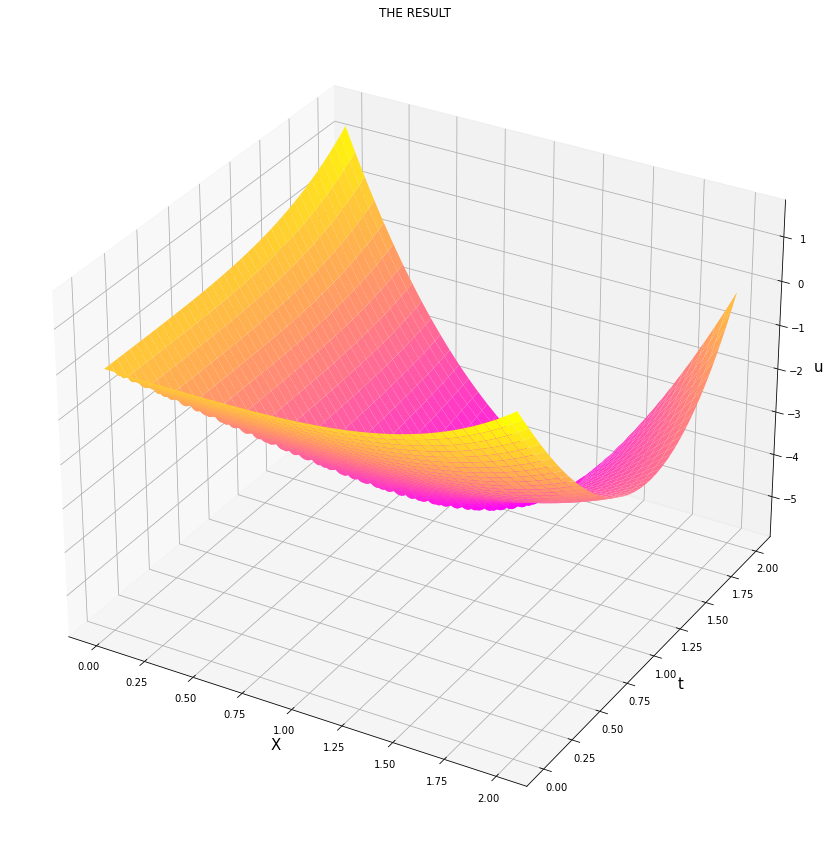

In [98]:
X = np.arange(0, x_max + h / 2, h)
Y = np.arange(0, t_max + tau / 2, tau)
X, Y = np.meshgrid(X, Y)

hf = plt.figure(figsize=[15, 15])
ax = hf.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('t', fontsize=15)
ax.set_zlabel('u', fontsize=15)

ax.plot_surface(X, Y, matrix, cmap='spring', linewidths=0.2);
plt.title("THE RESULT")

Все :)